# 0.0 IMPORTS

In [1]:
import warnings

import psycopg2 as pg
import pandas as pd
import pandas.io.sql as psql
import seaborn as sns
import numpy as np

from IPython.core.display    import HTML


## 0.1 Helper Functions

In [2]:
def jupyter_settings(): 
    %matplotlib inline 
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [24, 20]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') ) 
    pd.options.display.max_columns = None
    pd.options.display.max_rows = 1000
    pd.set_option( 'display.expand_frame_repr', False ) 
    sns.set()

In [3]:
jupyter_settings()
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


## 0.2 Data Collect & Data Loading

In [2]:
# credentials
host='ec2-3-229-252-6.compute-1.amazonaws.com'
db='defli5ko5i9jns'
port=5432
username='bxyxdyaksdwclm'
pwd='948dec09f999623e38b0baba146edc7ae0d53152ffa60db354523fcd3c1504bd'

In [3]:
conn = pg.connect(host=host,
                 database=db,
                 port=port,
                 user=username,
                 password=pwd)

In [4]:
conn.cursor()

cursor = conn.cursor()

query = """SELECT * FROM dw.investor tbInvestor
LEFT JOIN dw.investor_work tbInvestorWork ON tbinvestor.id = tbInvestorWork.investor
LEFT JOIN dw.investor_address tbInvestorAddress  ON tbInvestor.id = tbInvestorAddress.investor
left join dw.investor_company tbInvestorCompany ON tbInvestor.id = tbInvestorCompany.investor
LEFT JOIN dw.investment tbInvestment ON tbInvestor.id = tbInvestment.investor
LEFT JOIN dw.country tbCountry ON tbInvestorAddress.country = tbCountry.id
left join dw.project tbProject ON tbInvestment.project = tbProject.id
left join dw.project_category tbProjectCategory ON tbProject.project_category = tbProjectCategory.id"""

df_raw = psql.read_sql(query, conn)

cursor.close()
conn.close()

   id date_created       birth marital_status gender investor_type  \
0   3   2018-08-23  1982-08-11      Casado(a)    1.0            pf   
1  16   2018-09-03  1973-05-04      Casado(a)    1.0            pf   
2   6   2018-08-26  1985-07-04    Solteiro(a)    1.0            pf   
3  11   2018-08-27  1982-07-01      Casado(a)    1.0            pf   
4  34   2018-09-06  1987-10-08    Solteiro(a)    1.0            pf   

      nationality channel    id date_created  ...    validity     value  \
0  brazilian_born    None  3603   2021-01-08  ...  2018-10-31  750000.0   
1  brazilian_born    None    12   2018-09-03  ...  2018-10-31  750000.0   
2  brazilian_born    None  3591   2021-01-06  ...  2018-10-31  750000.0   
3  brazilian_born    None  2969   2020-11-12  ...  2018-10-31  750000.0   
4  brazilian_born    None  3069   2020-11-21  ...  2018-10-31  750000.0   

  project_category      closed   date_open modality    target id date_created  \
0                1  2018-11-01  2018-10-01     

# 1.0 DESCRIÇÃO DOS DADOS

In [10]:
df_raw.to_csv('../data/raw/data_raw.csv', index=False)

In [4]:
df_raw = pd.read_csv('../data/raw/data_raw.csv')

In [5]:
df1 = df_raw.copy()
df1.head(5)

,id,date_created,birth,marital_status,gender,investor_type,nationality,channel,id.1,date_created.1,investor,office,profession,id.2,date_created.2,country,investor.1,state,id.3,date_created.3,investor.2,constitution_date,company_type,id.4,date_created.4,anonymous,investor.3,project,value,id.5,date_created.5,iso2,iso3,name,phone_code,flag,id.6,date_created.6,validity,value.1,project_category,closed,date_open,modality,target,id.7,date_created.7,name.1
0,3,2018-08-23,1982-08-11,Casado(a),1.0,pf,brazilian_born,NaN,3603.0,2021-01-08,3.0,CFO,Administrador,6473.0,2021-01-08,1.0,3.0,BA,NaN,NaN,NaN,NaN,NaN,19.0,2018-09-03,0.0,3.0,1.0,1000.0,1.0,NaN,BR,BRA,Brasil,55.0,🇧🇷,1.0,2018-08-23,2018-10-31,750000.0,1.0,2018-11-01,2018-10-01,1.0,500000.0,1.0,NaN,Imobiliária
1,16,2018-09-03,1973-05-04,Casado(a),1.0,pf,brazilian_born,NaN,12.0,2018-09-03,16.0,CEO,Advogado,12.0,2018-09-03,1.0,16.0,SE,NaN,NaN,NaN,NaN,NaN,20.0,2018-09-03,0.0,16.0,1.0,81000.0,1.0,NaN,BR,BRA,Brasil,55.0,🇧🇷,1.0,2018-08-23,2018-10-31,750000.0,1.0,2018-11-01,2018-10-01,1.0,500000.0,1.0,NaN,Imobiliária
2,6,2018-08-26,1985-07-04,Solteiro(a),1.0,pf,brazilian_born,NaN,3591.0,2021-01-06,6.0,Partner,Empresario,6444.0,2021-01-06,1.0,6.0,BA,NaN,NaN,NaN,NaN,NaN,21.0,2018-09-03,0.0,6.0,1.0,15000.0,1.0,NaN,BR,BRA,Brasil,55.0,🇧🇷,1.0,2018-08-23,2018-10-31,750000.0,1.0,2018-11-01,2018-10-01,1.0,500000.0,1.0,NaN,Imobiliária
3,11,2018-08-27,1982-07-01,Casado(a),1.0,pf,brazilian_born,NaN,2969.0,2020-11-12,11.0,Economista,Economista,5322.0,2020-11-12,1.0,11.0,BA,NaN,NaN,NaN,NaN,NaN,26.0,2018-09-06,0.0,11.0,1.0,10000.0,1.0,NaN,BR,BRA,Brasil,55.0,🇧🇷,1.0,2018-08-23,2018-10-31,750000.0,1.0,2018-11-01,2018-10-01,1.0,500000.0,1.0,NaN,Imobiliária
4,34,2018-09-06,1987-10-08,Solteiro(a),1.0,pf,brazilian_born,NaN,3069.0,2020-11-21,34.0,Diretor,Administrador,5496.0,2020-11-21,1.0,34.0,CE,NaN,NaN,NaN,NaN,NaN,28.0,2018-09-06,1.0,34.0,1.0,5000.0,1.0,NaN,BR,BRA,Brasil,55.0,🇧🇷,1.0,2018-08-23,2018-10-31,750000.0,1.0,2018-11-01,2018-10-01,1.0,500000.0,1.0,NaN,Imobiliária


## 1.1 Renomeando Colunas

In [6]:
new_columns = ['id_investor', 'date_created_investor', 'id_birth_investor', 'marital_status_investor', 'gender_investor',
       'investor_type_investor', 'nationality_investor', 'id_channel_investor', 'id_investor_work', 'date_created_investor_work',
       'investor_investor_work', 'office_investor_work', 'profession_investor_work', 'id_investor_address', 'date_created_investor_address', 'country_investor_address',
       'investor_investor_address', 'state_investor_address', 'id_investor_company', 'date_created_investor_company', 'investor_investor_company',
       'constitution_date_investor_company', 'company_type_investor_company', 'id_investment', 'date_created_investment', 'anonymous_investment',
       'investor_investment', 'project_investment', 'value_investment', 'id_country', 'date_created_country', 'iso2_country', 'iso3_country',
       'country_name', 'phone_code_country', 'flag_country', 'id_project', 'date_created_project', 'validity_project', 'value_project',
       'project_category_project', 'closed_project', 'date_open_project', 'modality_project', 'target_project', 'id_project_category',
       'date_created_project_category', 'type_project_project_category']

df1.columns = new_columns

In [7]:
df1.head()

,id_investor,date_created_investor,id_birth_investor,marital_status_investor,gender_investor,investor_type_investor,nationality_investor,id_channel_investor,id_investor_work,date_created_investor_work,investor_investor_work,office_investor_work,profession_investor_work,id_investor_address,date_created_investor_address,country_investor_address,investor_investor_address,state_investor_address,id_investor_company,date_created_investor_company,investor_investor_company,constitution_date_investor_company,company_type_investor_company,id_investment,date_created_investment,anonymous_investment,investor_investment,project_investment,value_investment,id_country,date_created_country,iso2_country,iso3_country,country_name,phone_code_country,flag_country,id_project,date_created_project,validity_project,value_project,project_category_project,closed_project,date_open_project,modality_project,target_project,id_project_category,date_created_project_category,type_project_project_category
0,3,2018-08-23,1982-08-11,Casado(a),1.0,pf,brazilian_born,NaN,3603.0,2021-01-08,3.0,CFO,Administrador,6473.0,2021-01-08,1.0,3.0,BA,NaN,NaN,NaN,NaN,NaN,19.0,2018-09-03,0.0,3.0,1.0,1000.0,1.0,NaN,BR,BRA,Brasil,55.0,🇧🇷,1.0,2018-08-23,2018-10-31,750000.0,1.0,2018-11-01,2018-10-01,1.0,500000.0,1.0,NaN,Imobiliária
1,16,2018-09-03,1973-05-04,Casado(a),1.0,pf,brazilian_born,NaN,12.0,2018-09-03,16.0,CEO,Advogado,12.0,2018-09-03,1.0,16.0,SE,NaN,NaN,NaN,NaN,NaN,20.0,2018-09-03,0.0,16.0,1.0,81000.0,1.0,NaN,BR,BRA,Brasil,55.0,🇧🇷,1.0,2018-08-23,2018-10-31,750000.0,1.0,2018-11-01,2018-10-01,1.0,500000.0,1.0,NaN,Imobiliária
2,6,2018-08-26,1985-07-04,Solteiro(a),1.0,pf,brazilian_born,NaN,3591.0,2021-01-06,6.0,Partner,Empresario,6444.0,2021-01-06,1.0,6.0,BA,NaN,NaN,NaN,NaN,NaN,21.0,2018-09-03,0.0,6.0,1.0,15000.0,1.0,NaN,BR,BRA,Brasil,55.0,🇧🇷,1.0,2018-08-23,2018-10-31,750000.0,1.0,2018-11-01,2018-10-01,1.0,500000.0,1.0,NaN,Imobiliária
3,11,2018-08-27,1982-07-01,Casado(a),1.0,pf,brazilian_born,NaN,2969.0,2020-11-12,11.0,Economista,Economista,5322.0,2020-11-12,1.0,11.0,BA,NaN,NaN,NaN,NaN,NaN,26.0,2018-09-06,0.0,11.0,1.0,10000.0,1.0,NaN,BR,BRA,Brasil,55.0,🇧🇷,1.0,2018-08-23,2018-10-31,750000.0,1.0,2018-11-01,2018-10-01,1.0,500000.0,1.0,NaN,Imobiliária
4,34,2018-09-06,1987-10-08,Solteiro(a),1.0,pf,brazilian_born,NaN,3069.0,2020-11-21,34.0,Diretor,Administrador,5496.0,2020-11-21,1.0,34.0,CE,NaN,NaN,NaN,NaN,NaN,28.0,2018-09-06,1.0,34.0,1.0,5000.0,1.0,NaN,BR,BRA,Brasil,55.0,🇧🇷,1.0,2018-08-23,2018-10-31,750000.0,1.0,2018-11-01,2018-10-01,1.0,500000.0,1.0,NaN,Imobiliária


## 1.2 Dimensão dos Dados

In [8]:
print('Número de Linhas: {}'.format(df1.shape[0]))
print('Número de Colunas: {}'.format(df1.shape[1]))

Número de Linhas: 28093
Número de Colunas: 48


## 1.2 Check Types

In [9]:
df1.dtypes

id_investor                             int64
date_created_investor                  object
id_birth_investor                      object
marital_status_investor                object
gender_investor                       float64
investor_type_investor                 object
nationality_investor                   object
id_channel_investor                    object
id_investor_work                      float64
date_created_investor_work             object
investor_investor_work                float64
office_investor_work                   object
profession_investor_work               object
id_investor_address                   float64
date_created_investor_address          object
country_investor_address              float64
investor_investor_address             float64
state_investor_address                 object
id_investor_company                   float64
date_created_investor_company          object
investor_investor_company             float64
constitution_date_investor_company

##  1.3 Check Valores Nulos

In [10]:
df1.isna().sum()

id_investor                               0
date_created_investor                     0
id_birth_investor                     10216
marital_status_investor               17027
gender_investor                       10432
investor_type_investor                    0
nationality_investor                      0
id_channel_investor                   21050
id_investor_work                      17153
date_created_investor_work            17153
investor_investor_work                17153
office_investor_work                  17248
profession_investor_work              17163
id_investor_address                   10271
date_created_investor_address         10271
country_investor_address              10271
investor_investor_address             10271
state_investor_address                10273
id_investor_company                   27669
date_created_investor_company         27669
investor_investor_company             27669
constitution_date_investor_company    28093
company_type_investor_company   

## 1.4 Preechimento dos Valores Nulos

In [11]:
df1['value_investment'] = df1['value_investment'].replace(np.nan, 0)

## 1.5 Alteração dos Tipos Dos Dados

In [12]:
df1['date_created_investor'] = df1['date_created_investor'].astype('datetime64[ns]') 
df1['date_created_investor_work'] = df1['date_created_investor_work'].astype('datetime64[ns]')
df1['date_created_investor_address'] = df1['date_created_investor_address'].astype('datetime64[ns]')
df1['date_created_investor_company'] = df1['date_created_investor_company'].astype('datetime64[ns]')
df1['date_created_investment'] = df1['date_created_investment'].astype('datetime64[ns]')
df1['date_created_country'] = df1['date_created_country'].astype('datetime64[ns]')
df1['date_created_project'] = df1['date_created_project'].astype('datetime64[ns]')
df1['date_created_project'] = df1['date_created_project'].astype('datetime64[ns]')

## 1.7 Estatistica Descritiva

In [13]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

## 1.8 Atributos Numéricos

In [14]:
# Central Tendency - mean, meadina
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T
# dispersion - std, min, max, range
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std']
m

,attributes,min,max,range,mean,median,std
0,id_investor,1.0,26024.0,26023.0,1.163966e+04,11069.0,6.952222e+03
1,gender_investor,1.0,3.0,2.0,1.097560e+00,NaN,2.989994e-01
2,id_investor_work,5.0,7364.0,7359.0,4.172379e+03,NaN,1.667498e+03
3,investor_investor_work,1.0,26023.0,26022.0,1.004300e+04,NaN,6.158542e+03
4,id_investor_address,5.0,15056.0,15051.0,8.093355e+03,NaN,3.762385e+03
5,country_investor_address,1.0,229.0,228.0,1.515823e+00,NaN,9.619471e+00
6,investor_investor_address,1.0,26023.0,26022.0,1.133516e+04,NaN,6.340164e+03
7,id_investor_company,NaN,NaN,274.0,1.310094e+02,NaN,7.722764e+01
8,investor_investor_company,NaN,NaN,25133.0,1.287996e+04,NaN,5.641835e+03
9,constitution_date_investor_company,NaN,NaN,NaN,NaN,NaN,NaN


## 1.8 Atributos Categóricos

In [15]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

id_birth_investor                7881
marital_status_investor             6
investor_type_investor              2
nationality_investor                3
id_channel_investor                12
office_investor_work             2316
profession_investor_work         1602
state_investor_address             63
company_type_investor_company       8
iso2_country                       25
iso3_country                       25
country_name                       25
flag_country                       25
validity_project                   56
closed_project                     60
date_open_project                  58
type_project_project_category       6
dtype: int64

# 2.0 FEATURE ENGINEERING

In [16]:
df2 = df1.copy()

In [17]:
# year
df2['year_created_investor'] = df2['date_created_investor'].dt.year

# month
df2['month_created_investor'] = df2['date_created_investor'].dt.month

# day
df2['day_created_investor'] = df2['date_created_investor'].dt.day

# week of year
df2['week_of_year_investment'] = df2['date_created_investment'].dt.weekofyear

# year week
df2['year_week_investment'] = df2['date_created_investment'].dt.strftime( '%Y-%W' )

# year_investment
df2['year_investment'] = df2['date_created_investment'].dt.year

# is_investidor
df2['is_investor'] = '0'
for i in range(len(df2)):
    if(df2.loc[i, 'value_investment'] == 0):
        df2.loc[i, 'is_investor'] = 0
    else:
        df2.loc[i, 'is_investor'] = 1
        
# cont users that invest
df2['identifier_investor'] = df2['is_investor'].cumsum()

# 3.0 FILTRAGEM DOS DADOS

In [18]:
df3 = df2.copy()

# 4.0 ANALISE EXPLORATÓRIA DOS DADOS

In [19]:
df4 = df3.copy()

<AxesSubplot:xlabel='value_investment', ylabel='Density'>

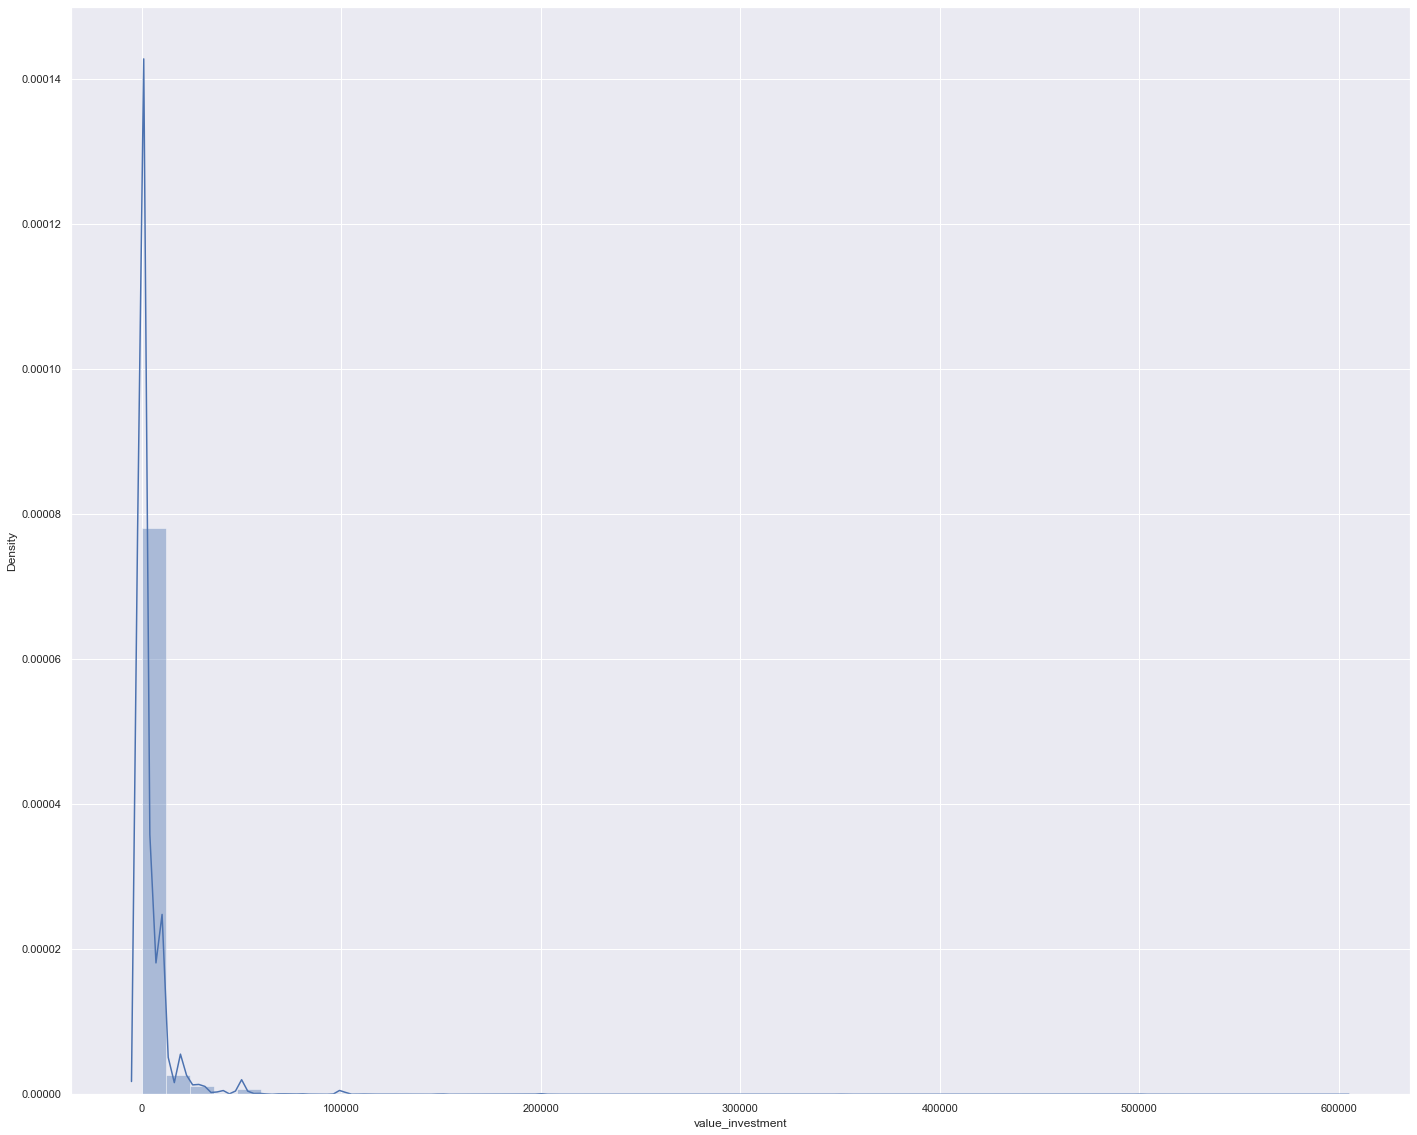

In [20]:
# Investimento Captado
sns.distplot(df2['value_investment'])

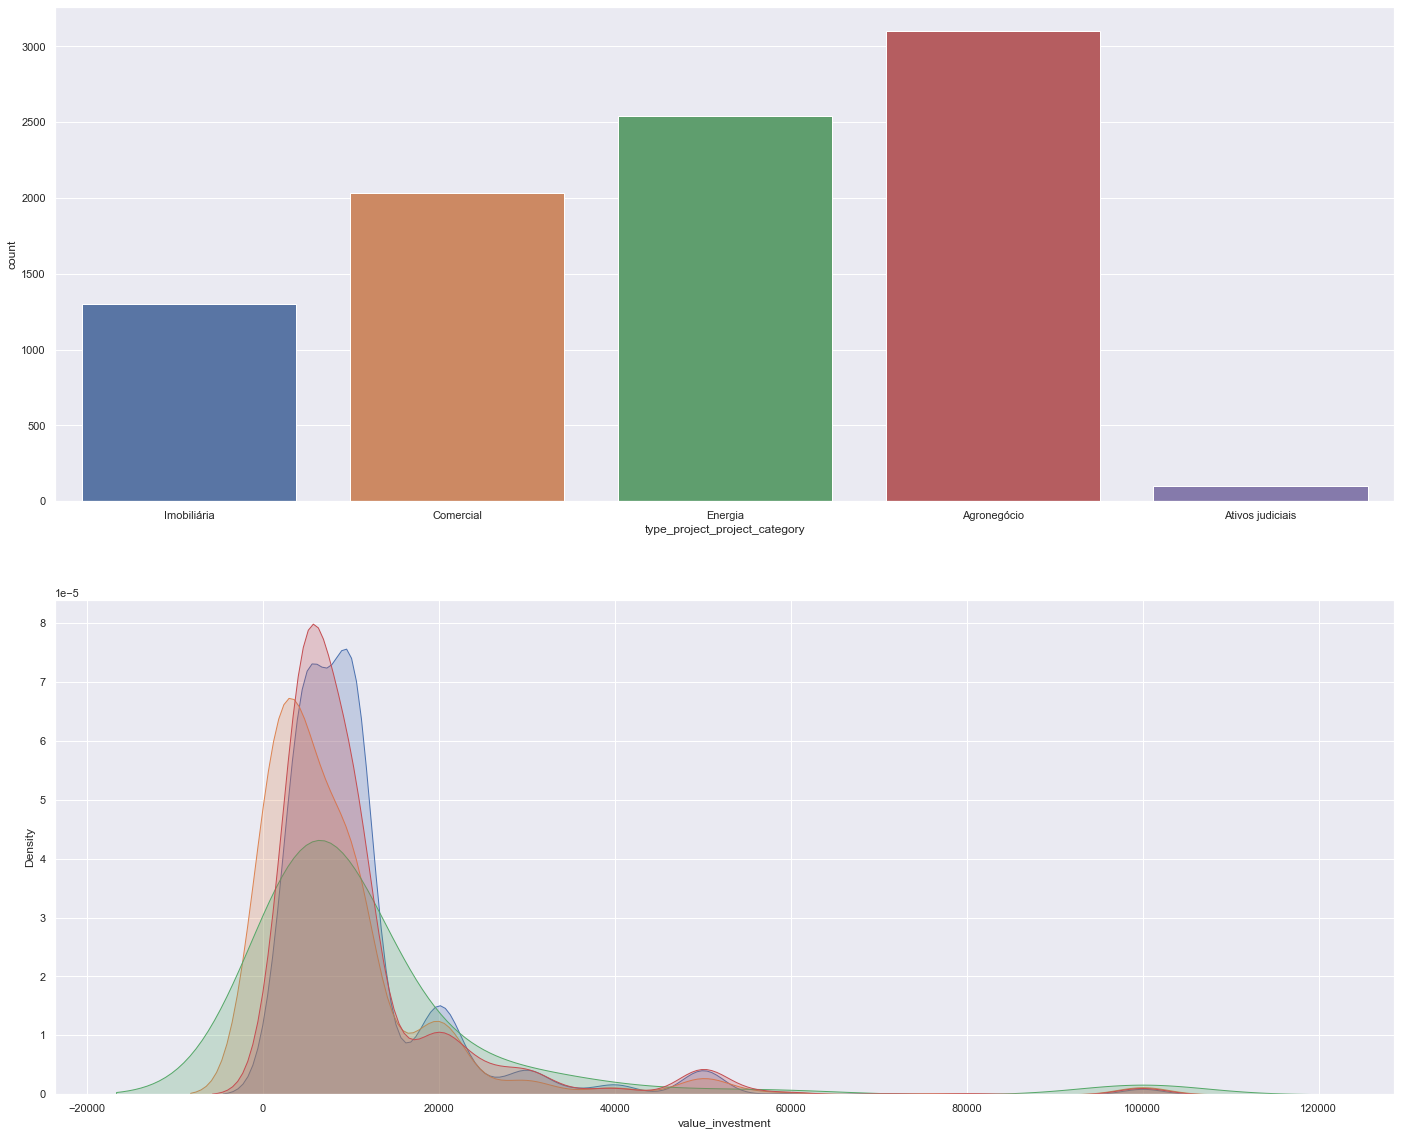

In [21]:
# Captação por Segmento de Produtos 
aux = df4[df4['value_investment'] <= 100000 ]
plt.subplot( 2, 1, 1 )
sns.countplot( aux['type_project_project_category'] )

plt.subplot( 2, 1, 2 )
sns.kdeplot(aux[aux['type_project_project_category']== 'Agronegócio']['value_investment'], label='type_project_project_category', shade=True, legend=True);
sns.kdeplot(aux[aux['type_project_project_category']== 'Comercial']['value_investment'], label='no_type_project_project_category', shade=True, legend=True);
sns.kdeplot(aux[aux['type_project_project_category']== 'Ativos judiciais']['value_investment'], label='no_type_project_project_category', shade=True, legend=True);
sns.kdeplot(aux[aux['type_project_project_category']== 'Energia']['value_investment'], label='no_type_project_project_category', shade=True, legend=True);

<AxesSubplot:xlabel='date_created_investor', ylabel='id_investor'>

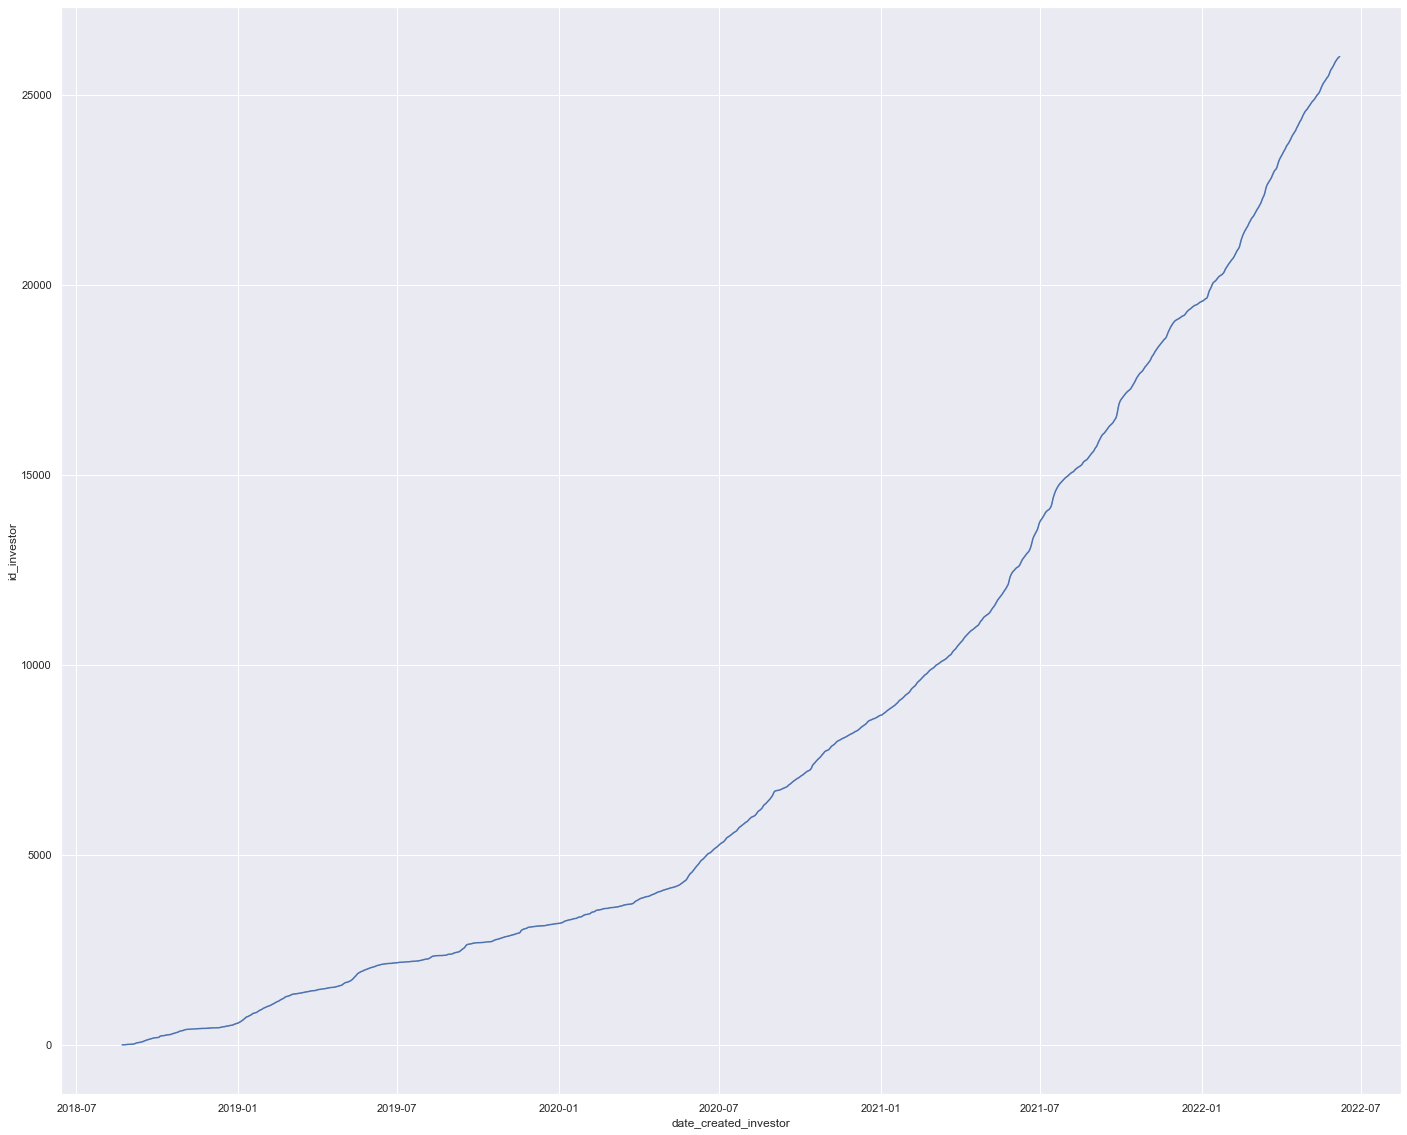

In [22]:
# Evolução da base de Usuários no tempo 
aux = df4.drop_duplicates(subset='id_investor')
sns.lineplot(y='id_investor', x='date_created_investor', data=aux)

## 4.1 Atributos Numéricos

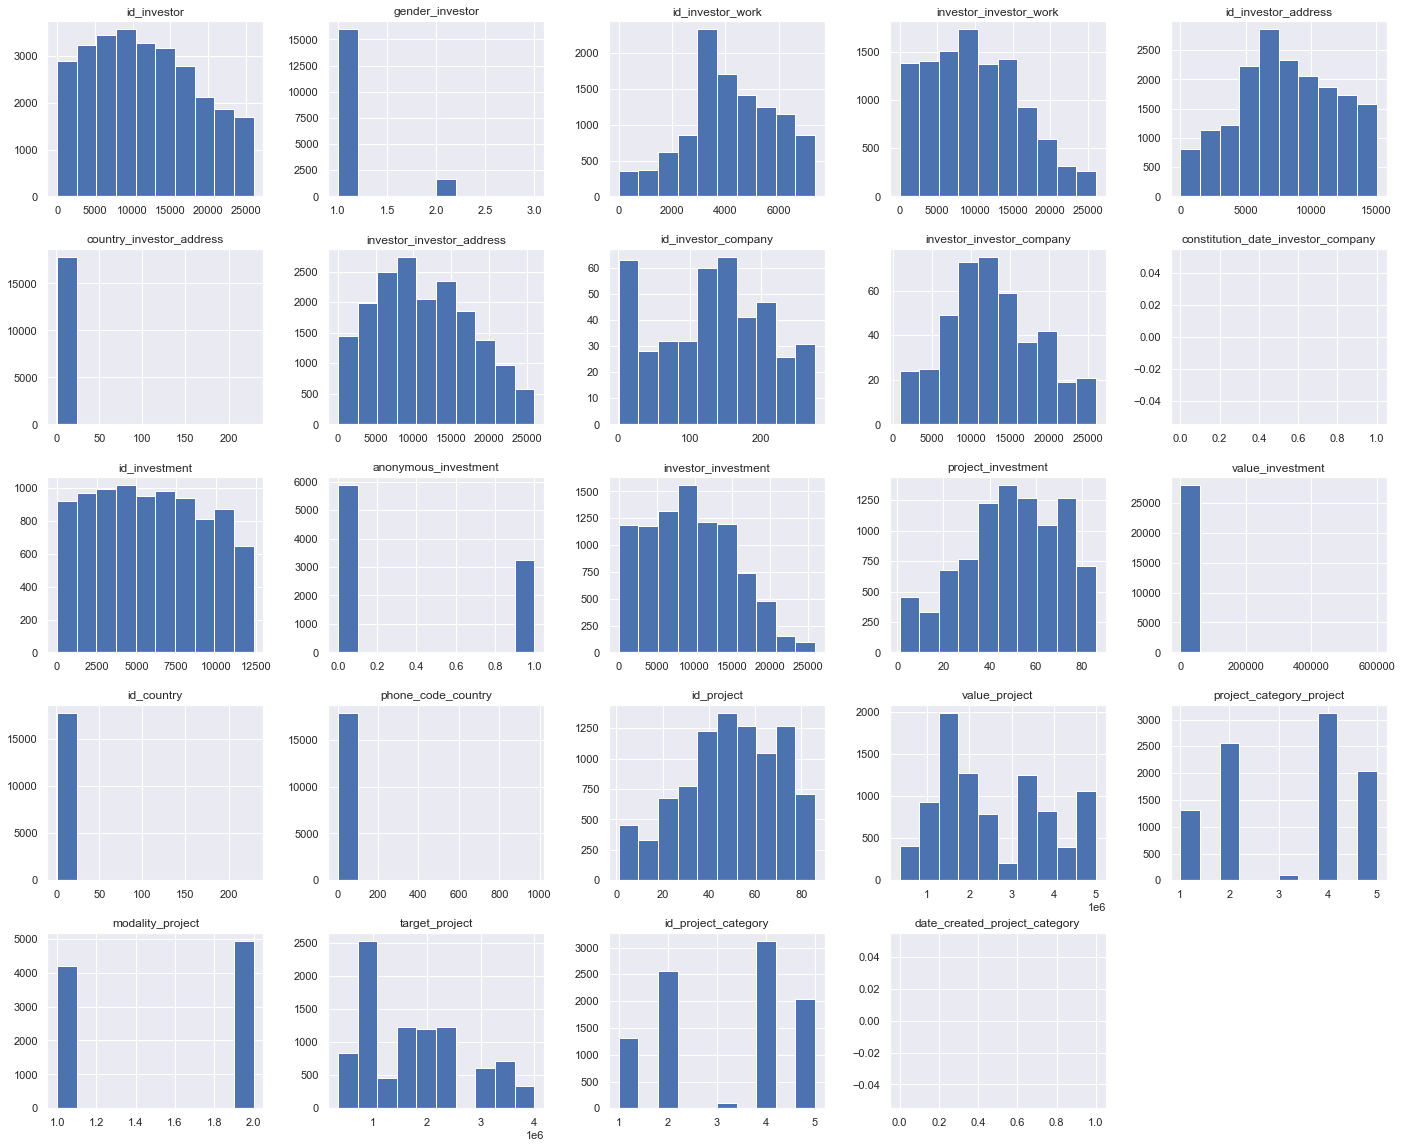

In [23]:
num_attributes.hist();

## 4.2 Atributos Categóricos

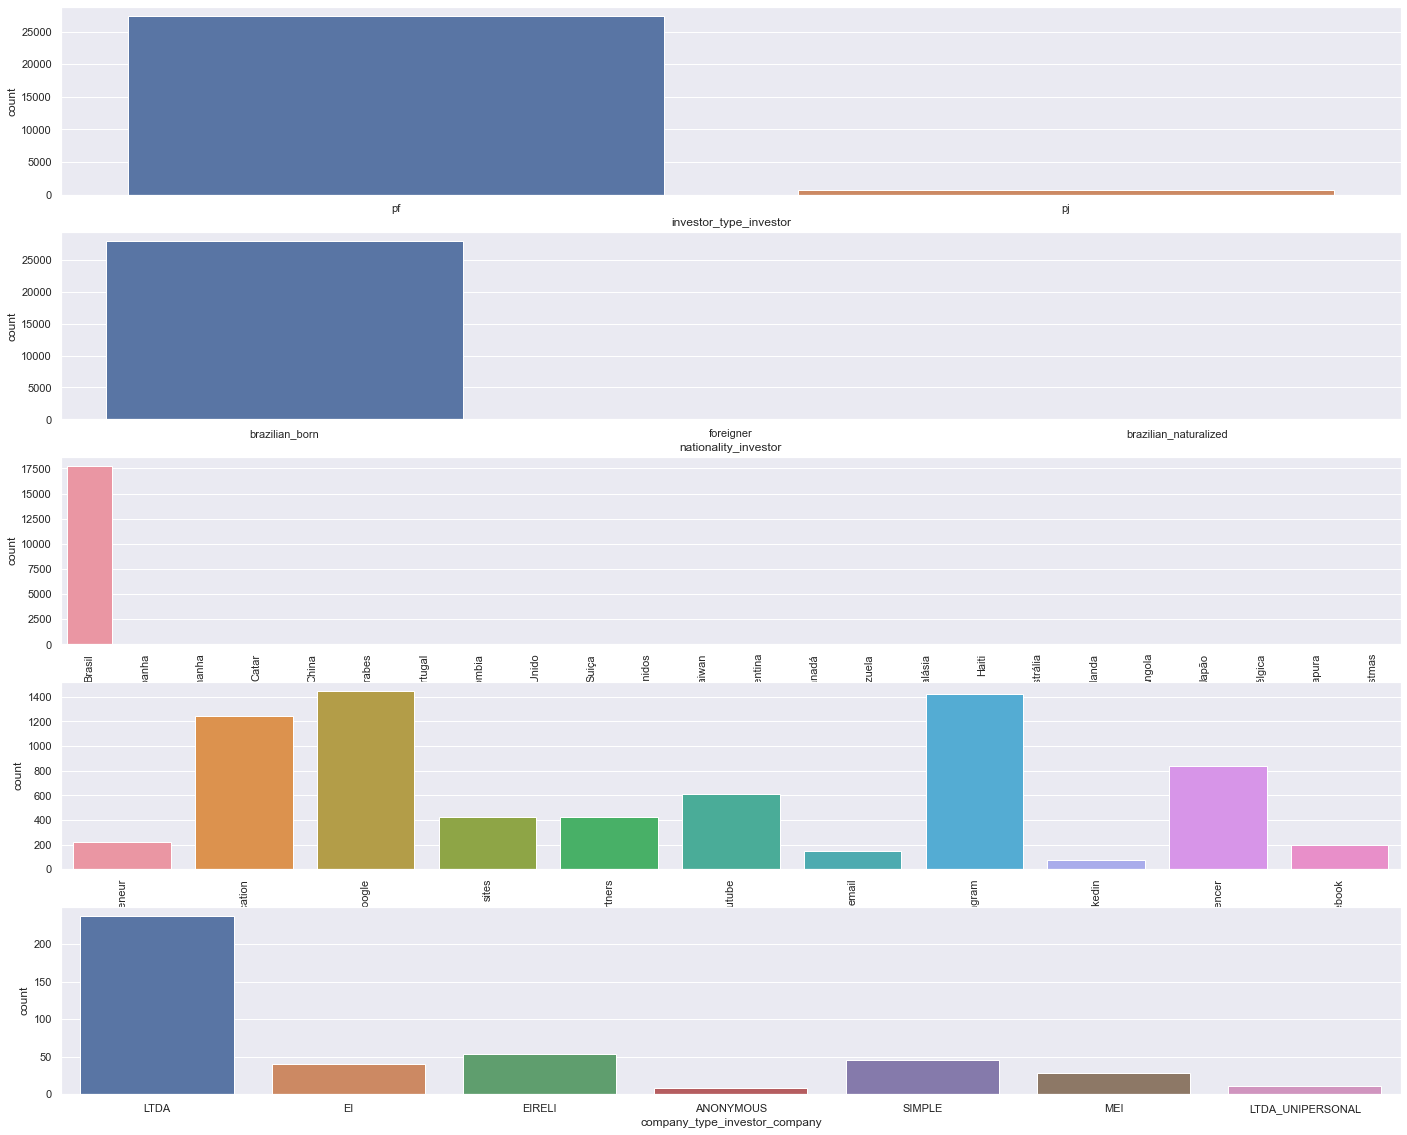

In [24]:
plt.subplot(5,1,1)
sns.countplot(df4['investor_type_investor']);

plt.subplot(5,1,2)
sns.countplot(df4['nationality_investor']);

plt.subplot(5,1,3)
sns.countplot(df4['country_name']);
plt.xticks(rotation='vertical');

plt.subplot(5, 1, 4)
sns.countplot(df4['id_channel_investor']);
plt.xticks(rotation='vertical');

plt.subplot(5, 1, 5)
sns.countplot(df4['company_type_investor_company']);